In [56]:
# Import all of the library 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import plotly.plotly as py
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.plotly as py
import cufflinks as cf
sns.set(color_codes=True)
cf.set_config_file(offline=False, world_readable=True, theme='pearl')
np.random.seed(67)

In [45]:
# import the data and see the basic description
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
df.columns = ["age", "sex", "cp", "trestbps", "chol","fbs", "restecg","thalach","exang", "oldpeak","slope", "ca", "thal", "num"]

print("---- Describe ----")
print(df.describe())
print('---- Info -----')
print(df.info())
print('---- Dtype ----')
print(df.dtypes)
print('---- Null Data ----')
print(df.isnull().sum())

---- Describe ----
              age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.410596    0.678808    3.165563  131.645695  246.738411    0.145695   
std      9.040163    0.467709    0.953612   17.612202   51.856829    0.353386   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     55.500000    1.000000    3.000000  130.000000  241.500000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000  
mean     0.986755  149.605960    0.327815    1.035430    1.596026    0.940397  
std      0.

In [101]:
# Replace Every Number greater than 0 to 1 to mark heart disease
df.loc[df['num'] > 0 , 'num'] = 1
df.ca = pd.to_numeric(df.ca,errors='coerce').fillna(0)
df.thal = pd.to_numeric(df.thal,errors='coerce').fillna(0)
print(df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object


In [99]:
# print the first 10 and last 10
print('------ First 10 -------')
df.head()

------ First 10 -------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [100]:
#  Last 10 
print('------ Last 10 -------')
df.tail()

------ Last 10 -------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


C:\Users\JDSeo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



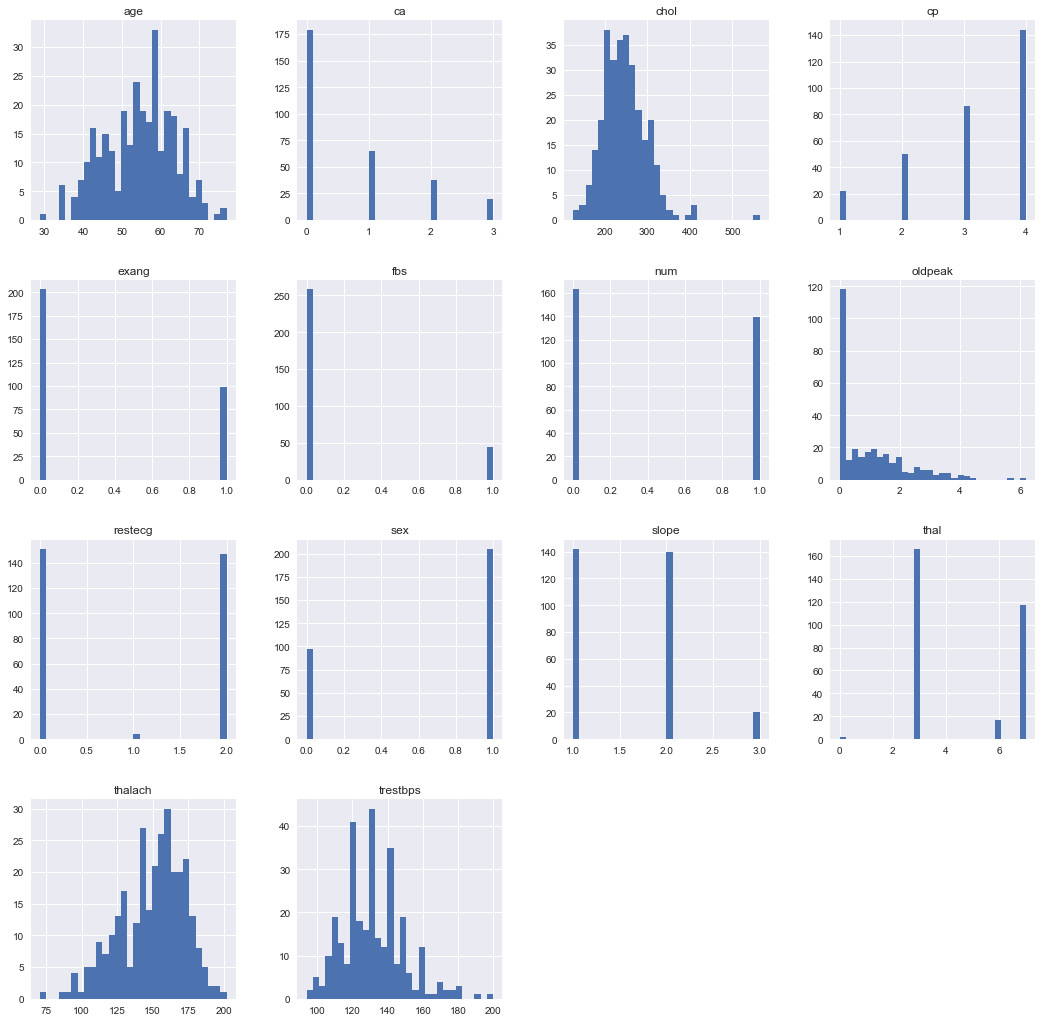

In [121]:
# get the histogram of every data points
fig = plt.figure(figsize = (18,18))
ax = fig.gca()
df.hist(ax=ax,bins=30)
plt.show()

C:\Users\JDSeo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



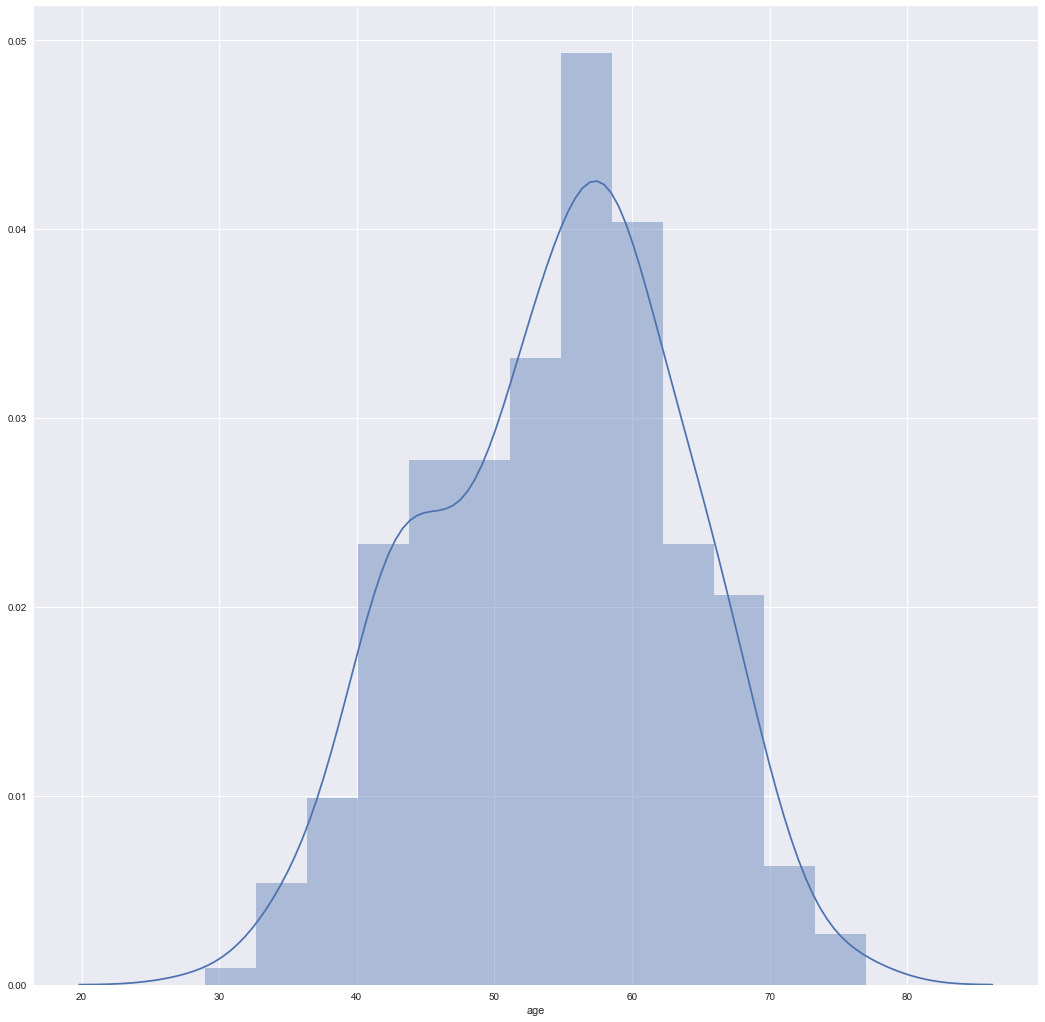

In [119]:
# more closer look at age
plt.figure(figsize=(18,18))
sns.distplot(df.age)
plt.show()

C:\Users\JDSeo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



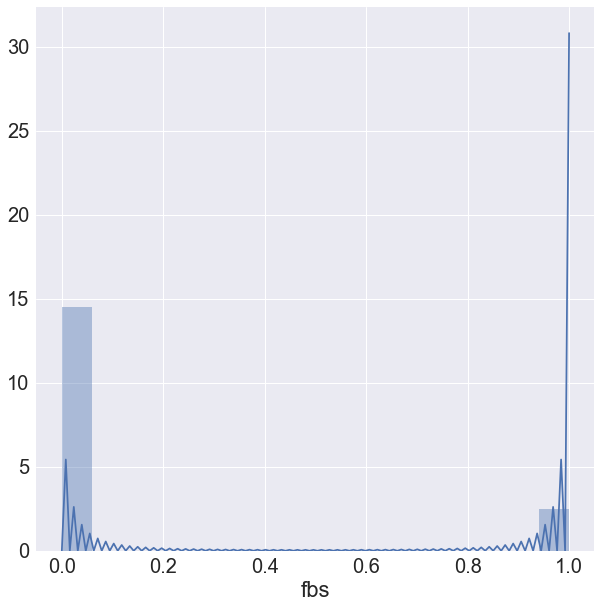

In [507]:
# more closer look at age
plt.close('all')
plt.figure(figsize=(10,10))
sns.distplot(df.fbs)
plt.show()

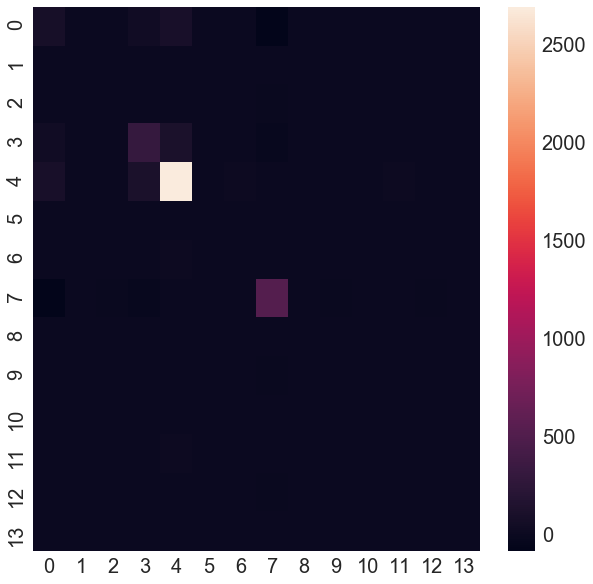

In [210]:
from numpy import dot
# calculate the Variance-Covariance Matrix 
sample = df.values
sample = sample - dot(np.ones((sample.shape[0],sample.shape[0])),sample)/(len(sample)-1)
covv = dot(sample.T,sample)/(len(sample)-1)
plt.figure(figsize=(10,10))
sns.heatmap(covv)
plt.show()

C:\Users\JDSeo\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning:

An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).



<IPython.core.display.Javascript object>


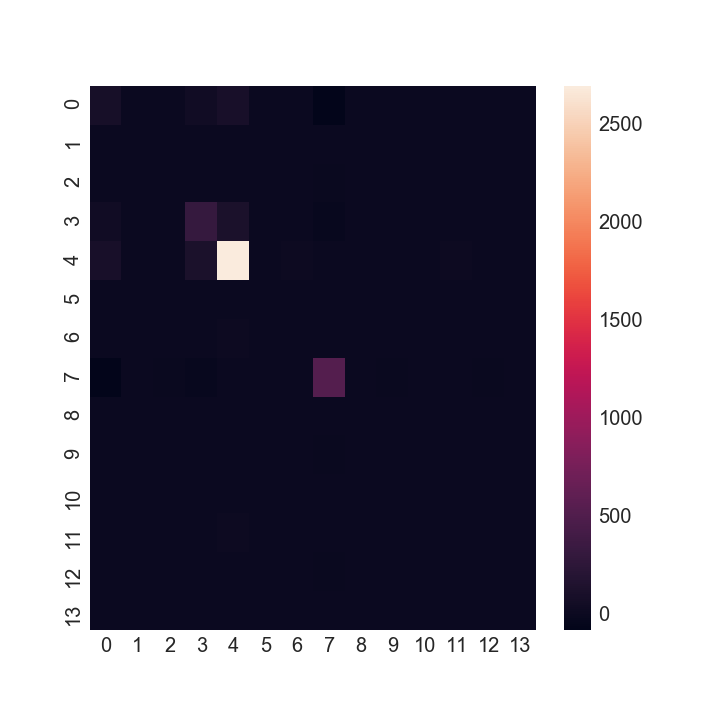

In [472]:
# calculate the Variance-Covariance Matrix 
import tensorflow as tf
sample = df.values

x = tf.placeholder(shape=sample.shape,dtype=tf.float32)

x_mean = x - tf.matmul(tf.ones([x.shape[0].value,x.shape[0].value]),x)/(x.shape[0].value-1)
covv = tf.matmul(tf.transpose(x_mean),x_mean)/(x.shape[0].value-1)

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

covvv = sess.run(covv,feed_dict={x:sample})
plt.figure(figsize=(10,10))
sns.heatmap(covvv)
plt.show()

<IPython.core.display.Javascript object>


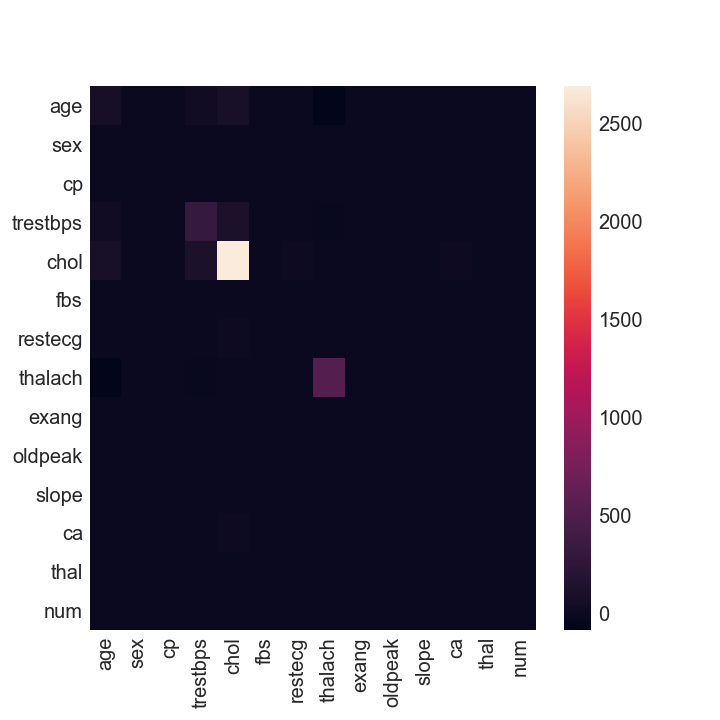

In [349]:
# compare with built in 
plt.figure(figsize=(10,10))
sns.heatmap(df.cov())
plt.show()

<IPython.core.display.Javascript object>


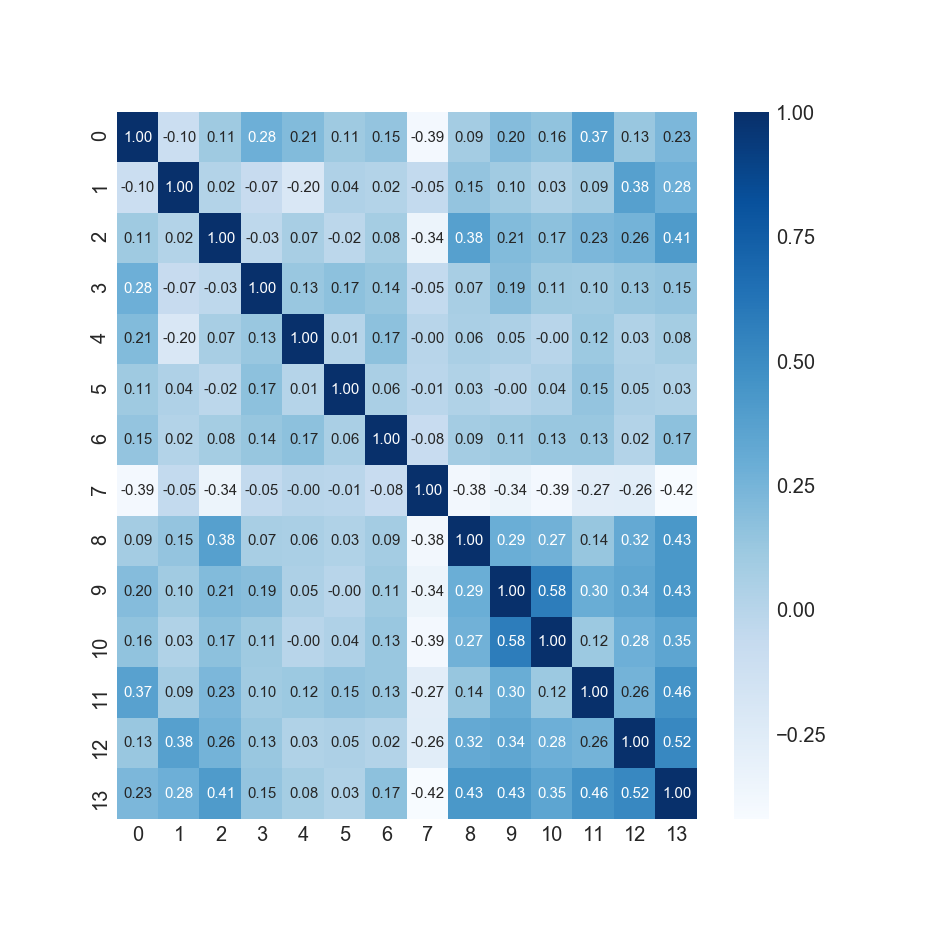

In [430]:
# calculate correaltion matrix 
sample = df.values
certering_mat = np.diag(np.ones((302))) - np.ones((302,302))/302
std_matrix = np.diag(np.std(sample,0))
temp = dot(certering_mat,dot(sample, np.linalg.inv(std_matrix)  ))
temp = dot(temp.T,temp)/len(sample)
plt.figure(figsize=(13,13))
sns.heatmap(np.around(temp,2),annot=True,fmt=".2f",cmap="Blues",annot_kws={"size": 15})
plt.show()

<IPython.core.display.Javascript object>


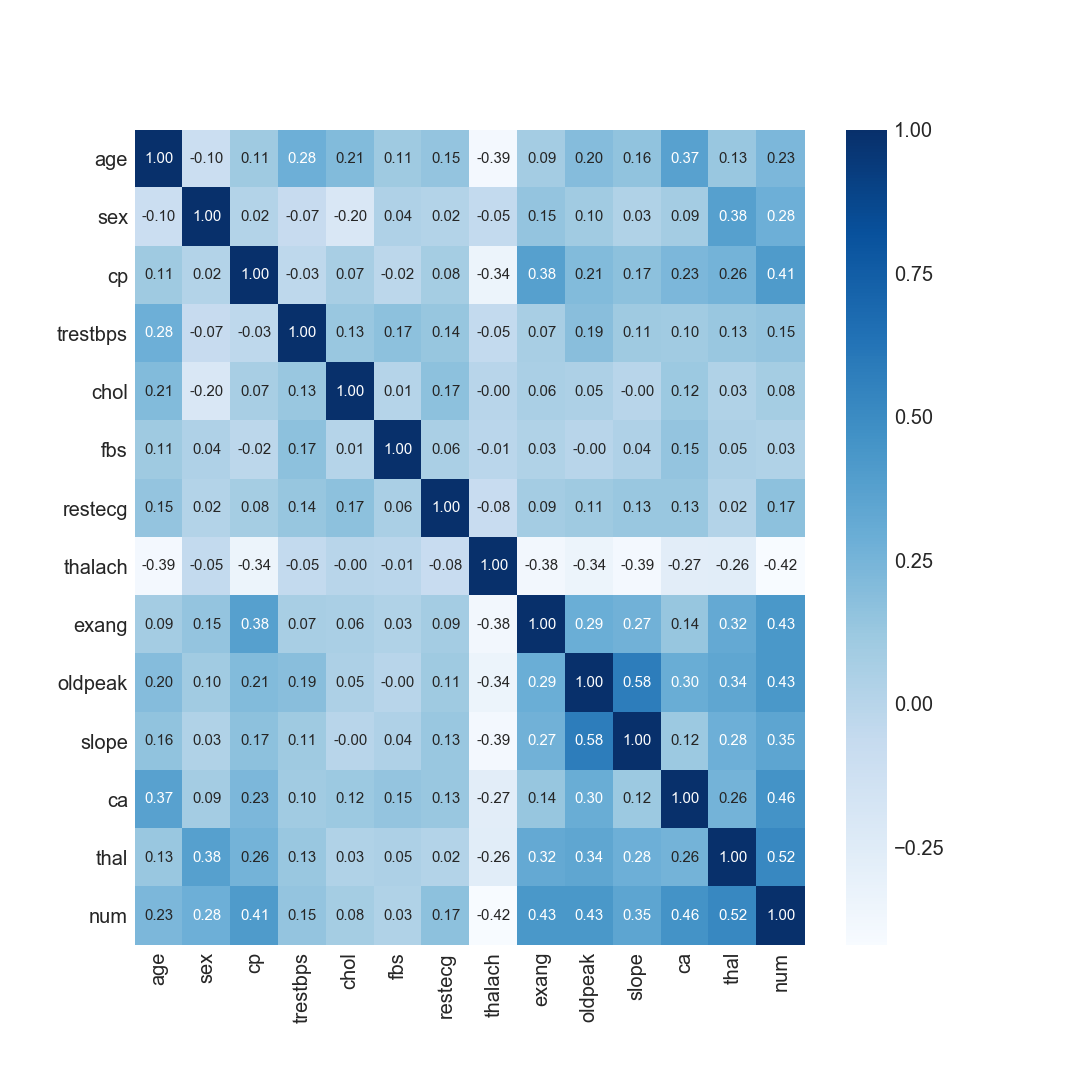

In [350]:
# correaltion matrix 
sns.set(font_scale=2)
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().round(2),annot=True,fmt=".2f",cmap="Blues",annot_kws={"size": 15})
plt.show()

C:\Users\JDSeo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\JDSeo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\JDSeo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\JDSeo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



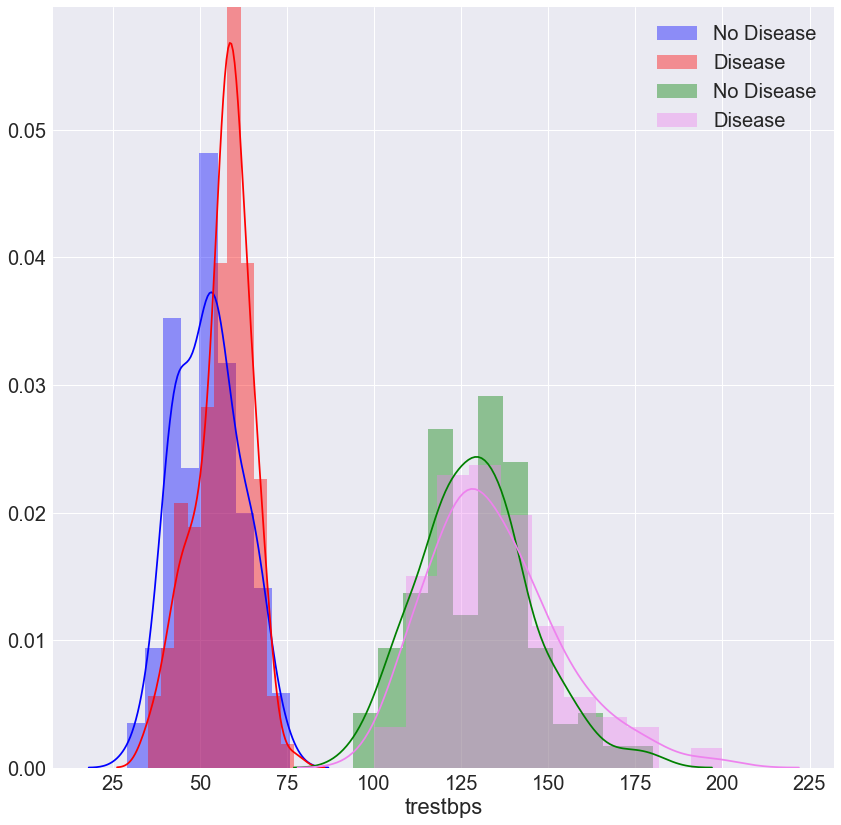

In [243]:
# plot the people who have heart vs not 
plt.figure(figsize=(14,14))
sns.distplot(df.age[df.num==0],label='No Disease',color='blue')
sns.distplot(df.age[df.num==1],label='Disease',color='Red')
sns.distplot(df.trestbps[df.num==0],label='No Disease',color='Green')
sns.distplot(df.trestbps[df.num==1],label='Disease',color='violet')
plt.legend()
plt.show()

In [504]:
%matplotlib inline
import pygal
from IPython.display import SVG, HTML
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

hist = pygal.Histogram()

count, division = np.histogram(df.age[df.num==0].values,bins=100)
temp = []
for c,div in zip(count,division):
    temp.append((c,div,div+1))
    
count, division = np.histogram(df.age[df.num==1].values,bins=100)
temp1 = []
for c,div in zip(count,division):
    temp1.append((c,div,div+1))
    
count, division = np.histogram(df.trestbps[df.num==0].values,bins=100)
temp2 = []
for c,div in zip(count,division):
    temp2.append((c,div,div+1))
    
count, division = np.histogram(df.trestbps[df.num==1].values,bins=100)
temp3 = []
for c,div in zip(count,division):
    temp3.append((c,div,div+1))
    
hist.add('No Disease age', temp)
hist.add('Disease age', temp1)
hist.add('No Disease ', temp2)
hist.add('Disease', temp3)
hist.render()
HTML(html_pygal.format(pygal_render=hist.render()))

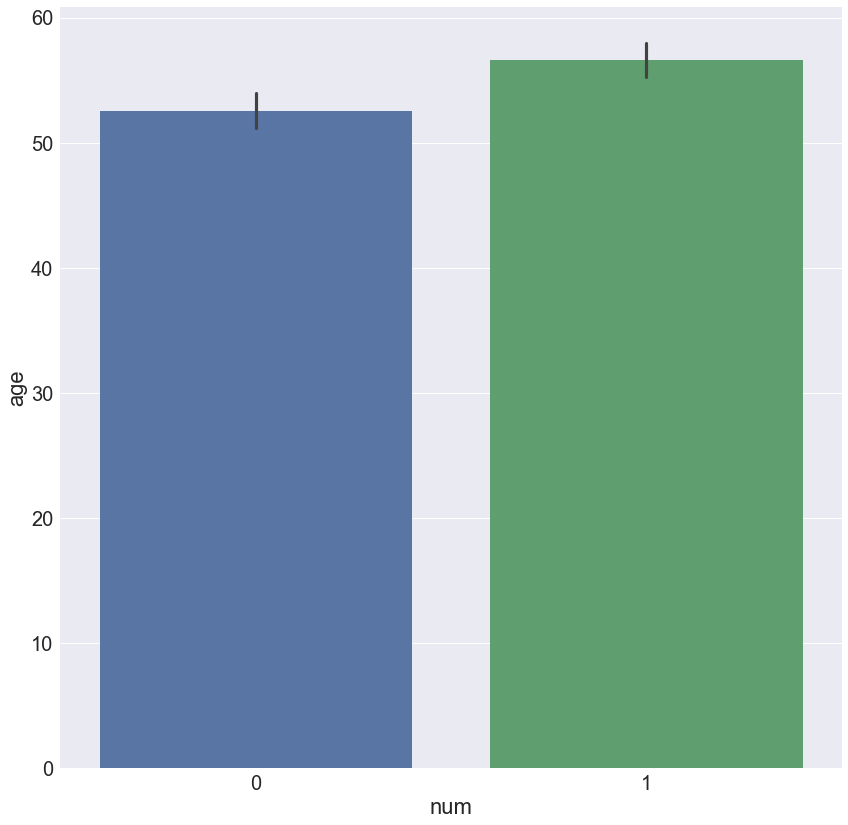

In [266]:
# average age of people with / out heart dieases
plt.figure(figsize=(14,14))
sns.barplot(x='num',y='age',data=df)
plt.show()

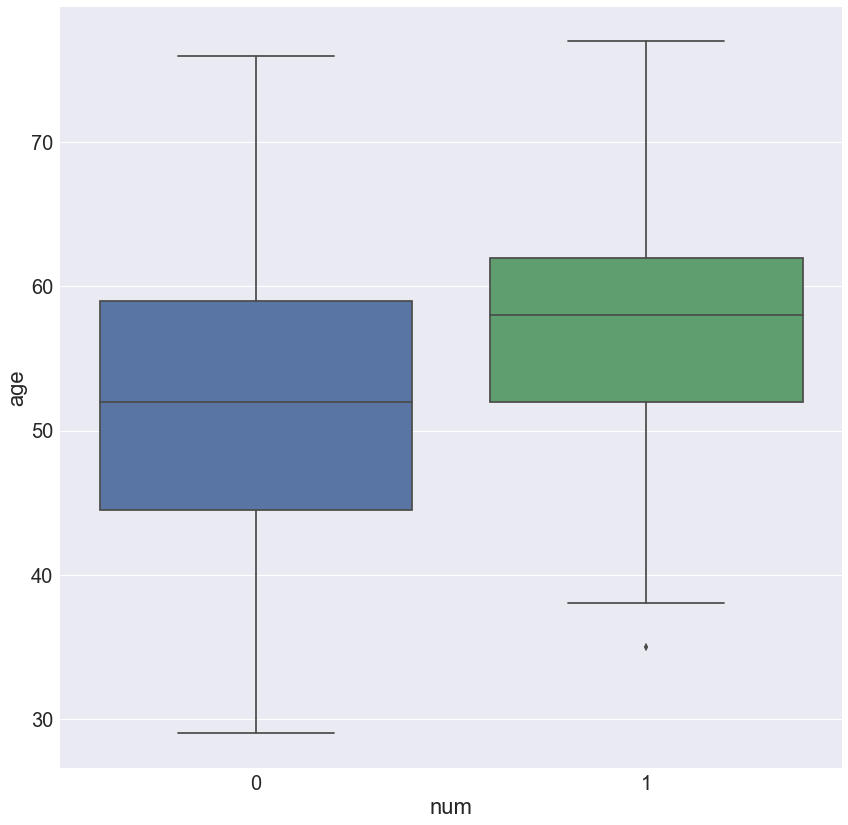

In [268]:
# box plot 
plt.figure(figsize=(14,14))
sns.boxplot(x="num", y='age', data=df)
plt.show()

<Figure size 1008x1008 with 0 Axes>

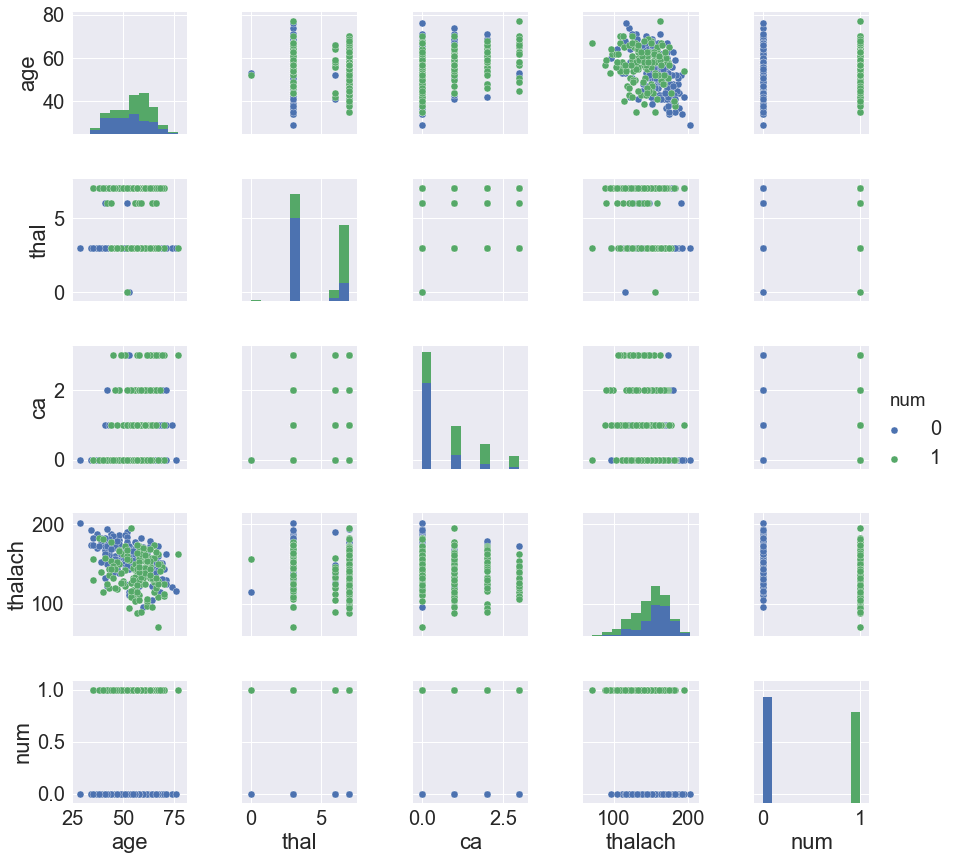

In [276]:
# show pair plot
plt.figure(figsize=(14,14))
sns.pairplot(df[['age','thal','ca','thalach','num']],hue='num')
plt.show()

In [296]:
# prepare color for other stuffs
import umap
from sklearn.manifold import TSNE
textd = [0 if cl==0 else 1 for cl in df['num']]
textd = np.array(textd)
digit_color=['rgba(236,223,1, 0.85)','rgba((1,223,102, 0.7))']
colors=[digit_color[d] for d in textd]
tooltips=list(map(str, textd))

In [298]:
%time dim_reduced = umap.UMAP(n_neighbors=15, n_components=3, min_dist=0.98, random_state=7654321).fit_transform(df.loc[:, df.columns != 'num'])
%time proj_3d = TSNE(n_components=3, perplexity=20, random_state=7654321).fit_transform(df.loc[:, df.columns != 'num'])

Wall time: 638 ms
Wall time: 8.04 s


<IPython.core.display.Javascript object>


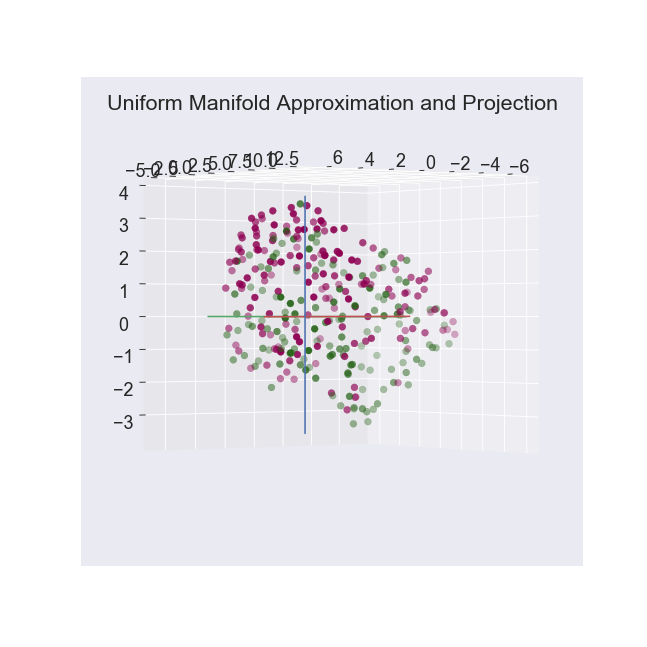

In [540]:
%matplotlib notebook
plt.close('all')
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dim_reduced[:,0], dim_reduced[:,1], dim_reduced[:,2],c=textd ,cmap=plt.cm.PiYG,s=60  )
# make simple, bare axis lines through space:
# Inpired: https://python-graph-gallery.com/372-3d-pca-result/
xAxisLine = ((min(dim_reduced[:,0])-np.mean(dim_reduced[:,0]), 
              max(dim_reduced[:,0])+np.mean(dim_reduced[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'g')

yAxisLine = ((0, 0),(min(dim_reduced[:,1])-np.mean(dim_reduced[:,1]), 
                     max(dim_reduced[:,1])+np.mean(dim_reduced[:,1])),  (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')

zAxisLine = ( (0, 0), (0,0),(min(dim_reduced[:,2])-np.mean(dim_reduced[:,2]),
                             max(dim_reduced[:,2])+np.mean(dim_reduced[:,2])),)
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')

plt.title('Uniform Manifold Approximation and Projection')
plt.show()

<IPython.core.display.Javascript object>


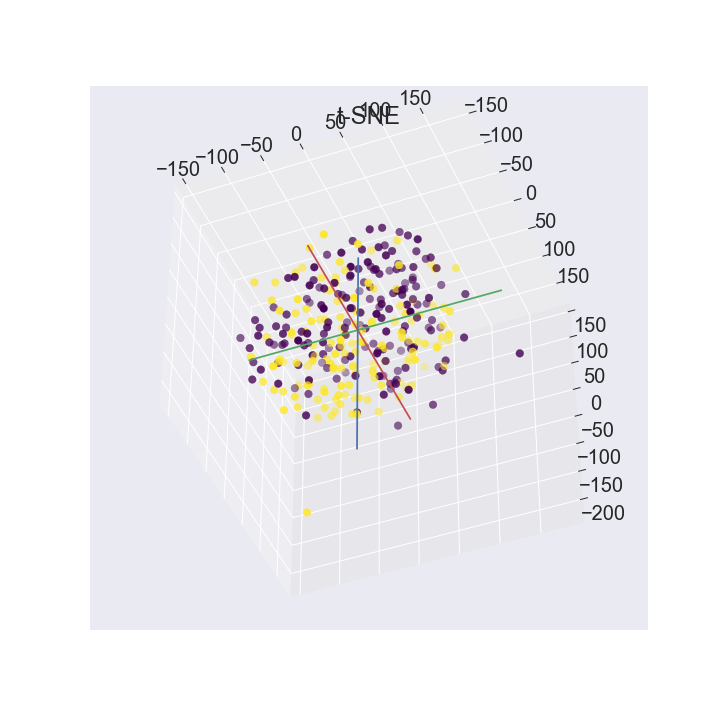

In [464]:
plt.close('all')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proj_3d[:,0], proj_3d[:,1], proj_3d[:,2],c=textd ,cmap=plt.cm.viridis,s=60  )

# make simple, bare axis lines through space:
# Inpired: https://python-graph-gallery.com/372-3d-pca-result/
xAxisLine = ((min(proj_3d[:,0])-np.mean(proj_3d[:,0]), 
              max(proj_3d[:,0])+np.mean(proj_3d[:,0])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'g')

yAxisLine = ((0, 0),(min(proj_3d[:,1])-np.mean(proj_3d[:,1]), 
                     max(proj_3d[:,1])+np.mean(proj_3d[:,1])),  (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')

zAxisLine = ( (0, 0), (0,0),(min(proj_3d[:,2])-np.mean(proj_3d[:,2]),
                             max(proj_3d[:,2])+np.mean(proj_3d[:,2])),)
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')
plt.title('t-SNE')
plt.show()